<a href="https://colab.research.google.com/github/BALaka-18/Data-Wrangling-Notebook/blob/master/Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import re
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib as ml
import seaborn as sns

%matplotlib inline
ml.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
patients=pd.read_csv('/content/drive/My Drive/patients.csv')
treatment=pd.read_csv('/content/drive/My Drive/treatments.csv')
adverse=pd.read_csv('/content/drive/My Drive/adverse_reactions.csv')
treatment_add = pd.read_csv('/content/drive/My Drive/treatments_cut.csv')

#### WORKING ON THE PATIENTS DATAFRAME

In [0]:
patients

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852.0,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341.0,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110.0,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109.0,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7


In [0]:
p = patients.copy()

In [0]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [0]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [0]:
patients[patients.address.isnull()==True]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [0]:
patients[patients.address.isnull()==True].shape[0]

12

###### Checks to perform
- Zip code col is stored in decimal format
- Certain zip codes of 4 digits
- For the state col sometimes full names are use and other times short forms are used
- Missing values for contact details of 12 patients
- Incorrect data types for assigned_sex and birthdate cols
- Erroneous data for weights and heights
- Inconsistent way of storing phone numbers in contact col
- Duplicate and not useful data in dataset
- Phone and email together in one col i.e. contact

In [0]:
p

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852.0,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341.0,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110.0,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109.0,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7


In [0]:
type(p.zip_code.values[0])

numpy.float64

In [0]:
p.zip_code.isnull().sum()

12

In [0]:
p_new = p.dropna(subset=['zip_code'],axis=0)

In [0]:
p_new

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852.0,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341.0,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110.0,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109.0,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7


In [0]:
p_new['zip_code'] = p_new.zip_code.astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
p_new['zip'] = p_new.zip_code.astype(str)
p_new

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi,zip
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6,92390
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2,61812
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8,68467
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7,7095
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1,36303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6,3852
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4,86341
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8,64110
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7,98109


In [0]:
ziplst = list(p_new['zip'].values)
ziplst

['92390',
 '61812',
 '68467',
 '7095',
 '36303',
 '32114',
 '84728',
 '95037',
 '64105',
 '10011',
 '49780',
 '37027',
 '24504',
 '35203',
 '74105',
 '37660',
 '93706',
 '30082',
 '59324',
 '95966',
 '2382',
 '10523',
 '10570',
 '33830',
 '12771',
 '87109',
 '61602',
 '70091',
 '19034',
 '12771',
 '80112',
 '37618',
 '90815',
 '60115',
 '4474',
 '10004',
 '54701',
 '57350',
 '1581',
 '2081',
 '30303',
 '56230',
 '33409',
 '82939',
 '4901',
 '38310',
 '15201',
 '30337',
 '60148',
 '43537',
 '18701',
 '52801',
 '50322',
 '2038',
 '1803',
 '89119',
 '31024',
 '91941',
 '15205',
 '27893',
 '92101',
 '93301',
 '2178',
 '92103',
 '13221',
 '46065',
 '92103',
 '1752',
 '53204',
 '60148',
 '45701',
 '6103',
 '70001',
 '2035',
 '74106',
 '94538',
 '55410',
 '40507',
 '2048',
 '19108',
 '11590',
 '73844',
 '30346',
 '45407',
 '10001',
 '34746',
 '20031',
 '56358',
 '30902',
 '85281',
 '14214',
 '77002',
 '8060',
 '33323',
 '33106',
 '79506',
 '4769',
 '68324',
 '99701',
 '11590',
 '58416',
 '656

##### In the USA, zip codes are 5 digit numbers. If we come across 4 digit numbers in the dataset, it means there was a zero at the beginning, but Excel automatically strips the zeroes to make it an integer or a proper decimal.

In [0]:
for i in range(len(ziplst)):
  if len(ziplst[i]) == 5:
    continue
  elif len(ziplst[i]) == 4:
    newv = '0' + ziplst[i]
    ziplst[i] = newv
    continue

In [0]:
p_new['zip_corrected'] = ziplst

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
p_new.drop(columns=['zip_code'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
p_new

,patient_id,assigned_sex,given_name,surname,address,city,state,country,contact,birthdate,weight,height,bmi,zip,zip_corrected
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6,92390,92390
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2,61812,61812
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8,68467,68467
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7,7095,07095
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1,36303,36303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6,3852,03852
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4,86341,86341
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8,64110,64110
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7,98109,98109


###### Checks left to perform
- For the state col sometimes full names are use and other times short forms are used
- Incorrect data types for assigned_sex and birthdate cols
- Erroneous data for weights and heights
- Inconsistent way of storing phone numbers in contact col
- Duplicate and not useful data in dataset
- Phone and email together in one col i.e. contact

In [0]:
state_list = list(p_new.state.values)
state_list

['California',
 'Illinois',
 'Nebraska',
 'NJ',
 'AL',
 'Florida',
 'NV',
 'CA',
 'MO',
 'New York',
 'MI',
 'TN',
 'VA',
 'AL',
 'OK',
 'VA',
 'California',
 'GA',
 'MT',
 'California',
 'MA',
 'NJ',
 'NY',
 'Florida',
 'New York',
 'NM',
 'IL',
 'LA',
 'PA',
 'New York',
 'CO',
 'TN',
 'CA',
 'Illinois',
 'ME',
 'New York',
 'WI',
 'SD',
 'MA',
 'MA',
 'GA',
 'MN',
 'FL',
 'WY',
 'ME',
 'TN',
 'PA',
 'GA',
 'IL',
 'OH',
 'PA',
 'Illinois',
 'IA',
 'MA',
 'MA',
 'NV',
 'GA',
 'California',
 'PA',
 'NC',
 'CA',
 'California',
 'MA',
 'California',
 'NY',
 'IN',
 'California',
 'MA',
 'WI',
 'IL',
 'OH',
 'CT',
 'LA',
 'MA',
 'OK',
 'California',
 'MN',
 'KY',
 'MA',
 'DE',
 'New York',
 'OK',
 'GA',
 'OH',
 'NY',
 'Florida',
 'MD',
 'MN',
 'GA',
 'AZ',
 'New York',
 'TX',
 'NJ',
 'FL',
 'Florida',
 'TX',
 'ME',
 'NE',
 'AK',
 'New York',
 'ND',
 'MO',
 'AL',
 'Florida',
 'AZ',
 'NC',
 'IN',
 'MD',
 'KS',
 'MS',
 'TX',
 'California',
 'VA',
 'TX',
 'New York',
 'California',
 'KY',
 'LA

In [0]:
for i in range(len(state_list)):
  if state_list[i] == 'New York':
    abbrv = str(state_list[i][0] + state_list[i][4])
    state_list[i] = abbrv
    continue
  elif len(state_list[i]) > 2:
    abbrv = str(state_list[i][:2]).upper()
    state_list[i] = abbrv
    continue

In [0]:
state_list

['CA',
 'IL',
 'NE',
 'NJ',
 'AL',
 'FL',
 'NV',
 'CA',
 'MO',
 'NY',
 'MI',
 'TN',
 'VA',
 'AL',
 'OK',
 'VA',
 'CA',
 'GA',
 'MT',
 'CA',
 'MA',
 'NJ',
 'NY',
 'FL',
 'NY',
 'NM',
 'IL',
 'LA',
 'PA',
 'NY',
 'CO',
 'TN',
 'CA',
 'IL',
 'ME',
 'NY',
 'WI',
 'SD',
 'MA',
 'MA',
 'GA',
 'MN',
 'FL',
 'WY',
 'ME',
 'TN',
 'PA',
 'GA',
 'IL',
 'OH',
 'PA',
 'IL',
 'IA',
 'MA',
 'MA',
 'NV',
 'GA',
 'CA',
 'PA',
 'NC',
 'CA',
 'CA',
 'MA',
 'CA',
 'NY',
 'IN',
 'CA',
 'MA',
 'WI',
 'IL',
 'OH',
 'CT',
 'LA',
 'MA',
 'OK',
 'CA',
 'MN',
 'KY',
 'MA',
 'DE',
 'NY',
 'OK',
 'GA',
 'OH',
 'NY',
 'FL',
 'MD',
 'MN',
 'GA',
 'AZ',
 'NY',
 'TX',
 'NJ',
 'FL',
 'FL',
 'TX',
 'ME',
 'NE',
 'AK',
 'NY',
 'ND',
 'MO',
 'AL',
 'FL',
 'AZ',
 'NC',
 'IN',
 'MD',
 'KS',
 'MS',
 'TX',
 'CA',
 'VA',
 'TX',
 'NY',
 'CA',
 'KY',
 'LA',
 'LA',
 'TX',
 'CA',
 'NY',
 'MI',
 'FL',
 'MA',
 'OK',
 'MA',
 'WA',
 'IN',
 'NY',
 'SC',
 'WV',
 'PA',
 'SC',
 'NY',
 'OH',
 'CA',
 'FL',
 'VA',
 'OH',
 'IL',
 'TX',
 'NY',

In [0]:
p_new['state_updated'] = state_list
p_new.drop(columns=['state'],axis = 1,inplace=True)
p_new

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,patient_id,assigned_sex,given_name,surname,address,city,country,contact,birthdate,weight,height,bmi,zip,zip_corrected,state_updated
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6,92390,92390,CA
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2,61812,61812,IL
2,3,male,Jae,Debord,1493 Poling Farm Road,York,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8,68467,68467,NE
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7,7095,07095,NJ
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1,36303,36303,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6,3852,03852,ME
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4,86341,86341,AZ
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8,64110,64110,MO
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7,98109,98109,WA


In [0]:
p_new.drop(columns=['zip'],axis=1,inplace=True)
p_new

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,patient_id,assigned_sex,given_name,surname,address,city,country,contact,birthdate,weight,height,bmi,zip_corrected,state_updated
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6,92390,CA
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2,61812,IL
2,3,male,Jae,Debord,1493 Poling Farm Road,York,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8,68467,NE
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7,07095,NJ
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1,36303,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6,03852,ME
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4,86341,AZ
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8,64110,MO
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7,98109,WA


###### Checks left to perform
- Erroneous data for weights and heights
- Inconsistent way of storing phone numbers in contact col
- Duplicate and not useful data in dataset
- Phone and email together in one col i.e. contact

In [0]:
p_new

,patient_id,assigned_sex,given_name,surname,address,city,country,contact,birthdate,weight,height,bmi,zip_corrected,state_updated
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6,92390,CA
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2,61812,IL
2,3,male,Jae,Debord,1493 Poling Farm Road,York,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8,68467,NE
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7,07095,NJ
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1,36303,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6,03852,ME
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4,86341,AZ
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8,64110,MO
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7,98109,WA


In [0]:
p_new[p_new.height > 75]

,patient_id,assigned_sex,given_name,surname,address,city,country,contact,birthdate,weight,height,bmi,zip_corrected,state_updated
83,84,male,Chen,Yao,2566 Ingram Street,Dayton,United States,937-523-1224ChenYao@teleworm.us,11/8/1975,214.7,76,26.1,45407,OH
88,89,male,Marius,Hansen,3251 Radio Park Drive,Augusta,United States,706-755-5723MariusHansen@teleworm.us,6/27/1948,227.7,76,27.7,30902,GA
121,122,male,Frydryk,Adamski,1845 Saint Marys Avenue,Syracuse,United States,FrydrykAdamski@armyspy.com1 315 869 4408,10/12/1941,230.8,76,28.1,13221,NY
238,239,male,Aksel,Vestergaard,2246 Pheasant Ridge Road,Philadelphia,United States,AkselHVestergaard@armyspy.com215-528-2193,5/2/1988,187.2,78,21.6,19139,PA
418,419,male,Mahmud,Kadyrov,3390 Hidden Meadow Drive,Stanton,United States,MahmudKadyrov@gustr.com1 701 745 2700,6/18/1980,215.2,79,24.2,58571,ND
487,488,male,Ivar,Löfgren,1346 Nicholas Street,Ottawa,United States,IvarLofgren@armyspy.com1 785 229 1188,11/7/1962,242.4,77,28.7,66067,KS


In [0]:
print(max(p_new['weight'].values))
print(min(p_new['weight'].values))

p_new[p_new.weight < 50]

255.9
48.8


,patient_id,assigned_sex,given_name,surname,address,city,country,contact,birthdate,weight,height,bmi,zip_corrected,state_updated
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,United States,330-202-2145CamillaZaitseva@superrito.com,11/26/1938,48.8,63,19.1,44691,OH


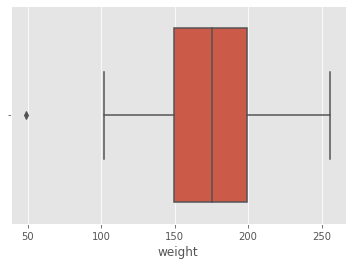

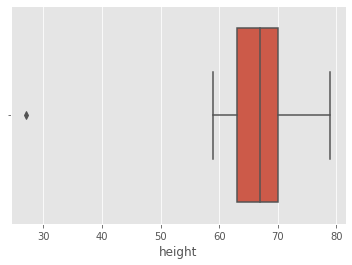

In [0]:
sns.boxplot(x='weight',data=p_new)
plt.show()
sns.boxplot(x='height',data=p_new)
plt.show()

##### The conventional way of storing weight and height information in the USA is by using pounds(lbs) and ft,in respectively

In [0]:
p_new['weight'].replace(48.8,(48.8*2.205),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
p_new.iloc[209:210, 9:10]

,weight
210,107.604


In [0]:
p_new[p_new.height < 30]

,patient_id,assigned_sex,given_name,surname,address,city,country,contact,birthdate,weight,height,bmi,zip_corrected,state_updated
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1,36303,AL


In [0]:
p_new['height_cm'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
for i in range(p_new.shape[0]):
  p_new.iloc[i,14] = (sqrt(p_new.iloc[i,9]/(2.205*p_new.iloc[i,11])))*100

p_new.drop(columns=['height'],axis=1,inplace=True)
p_new

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,patient_id,assigned_sex,given_name,surname,address,city,country,contact,birthdate,weight,bmi,zip_corrected,state_updated,height_cm
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,19.6,92390,CA,167.808114
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,19.2,61812,IL,167.514849
2,3,male,Jae,Debord,1493 Poling Farm Road,York,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,24.8,68467,NE,180.316613
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,31.7,07095,NJ,177.772234
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,26.1,36303,AL,182.795328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,24.6,03852,ME,182.720542
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,34.4,86341,AZ,177.729651
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,26.8,64110,MO,170.208085
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,27.7,98109,WA,170.184395


###### Checks left to perform
- Inconsistent way of storing phone numbers in contact col
- Phone and email together in one col i.e. contact

In [0]:
test_str = str(p_new.contact.values[1])
test_str

'PamelaSHill@cuvox.de+1 (217) 569-3204'

In [0]:
match = re.search(r'[^0-9]{1,20}@[\w.-]{3,20}.[A-Za-z]{2,3}', test_str)
res = match.group(0)
res

'PamelaSHill@cuvox.de'

In [0]:
p_new['email_filtered'] = ""
p_new

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,patient_id,assigned_sex,given_name,surname,address,city,country,contact,birthdate,weight,bmi,zip_corrected,state_updated,height_cm,email_filtered
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,19.6,92390,CA,167.808114,
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,19.2,61812,IL,167.514849,
2,3,male,Jae,Debord,1493 Poling Farm Road,York,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,24.8,68467,NE,180.316613,
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,31.7,07095,NJ,177.772234,
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,26.1,36303,AL,182.795328,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,24.6,03852,ME,182.720542,
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,34.4,86341,AZ,177.729651,
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,26.8,64110,MO,170.208085,
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,27.7,98109,WA,170.184395,


In [0]:
for i in range(p_new.shape[0]):
  test_str = str(list(p_new.contact.values)[i])
  match = re.search(r'[^0-9]{1,20}@[\w.-]{3,20}.[A-Za-z]{2,3}', test_str)
  p_new.iloc[i,14] = match.group(0)

p_new

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,patient_id,assigned_sex,given_name,surname,address,city,country,contact,birthdate,weight,bmi,zip_corrected,state_updated,height_cm,email_filtered
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,19.6,92390,CA,167.808114,ZoeWellish@superrito.com
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,19.2,61812,IL,167.514849,PamelaSHill@cuvox.de
2,3,male,Jae,Debord,1493 Poling Farm Road,York,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,24.8,68467,NE,180.316613,JaeMDebord@gustr.com
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,31.7,07095,NJ,177.772234,PhanBaLiem@jourrapide.com
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,26.1,36303,AL,182.795328,TimNeudorf@cuvox.de
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,24.6,03852,ME,182.720542,MustafaLindstrom@jourrapide.com
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,34.4,86341,AZ,177.729651,RumanBisliev@gustr.com
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,26.8,64110,MO,170.208085,JinkedeKeizer@teleworm.us
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,27.7,98109,WA,170.184395,ChidaluOnyekaozulu@jourrapide.com


In [0]:
test2 = p_new.contact.values[0]
test2

'951-719-9170ZoeWellish@superrito.com'

In [0]:
match = re.search(r'[^0-9]{1,20}@[\w.-]{3,20}.[A-Za-z]{2,3}', test2)
res = match.group(0)
res_f = test2.replace(res,'')

In [0]:
res_f

'951-719-9170'

In [0]:
p_new['phn_filtered'] = ""
p_new

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,patient_id,assigned_sex,given_name,surname,address,city,country,contact,birthdate,weight,bmi,zip_corrected,state_updated,height_cm,email_filtered,phn_filtered
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,19.6,92390,CA,167.808114,ZoeWellish@superrito.com,
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,19.2,61812,IL,167.514849,PamelaSHill@cuvox.de,
2,3,male,Jae,Debord,1493 Poling Farm Road,York,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,24.8,68467,NE,180.316613,JaeMDebord@gustr.com,
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,31.7,07095,NJ,177.772234,PhanBaLiem@jourrapide.com,
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,26.1,36303,AL,182.795328,TimNeudorf@cuvox.de,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,24.6,03852,ME,182.720542,MustafaLindstrom@jourrapide.com,
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,34.4,86341,AZ,177.729651,RumanBisliev@gustr.com,
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,26.8,64110,MO,170.208085,JinkedeKeizer@teleworm.us,
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,27.7,98109,WA,170.184395,ChidaluOnyekaozulu@jourrapide.com,


In [0]:
for i in range(p_new.shape[0]):
  test_str = str(list(p_new.contact.values)[i])
  match = re.search(r'[^0-9]{1,20}@[\w.-]{3,20}.[A-Za-z]{2,3}', test_str)
  p_new.iloc[i,15] = test_str.replace(match.group(0),'')

p_new

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,patient_id,assigned_sex,given_name,surname,address,city,country,contact,birthdate,weight,bmi,zip_corrected,state_updated,height_cm,email_filtered,phn_filtered
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,19.6,92390,CA,167.808114,ZoeWellish@superrito.com,951-719-9170
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,19.2,61812,IL,167.514849,PamelaSHill@cuvox.de,+1 (217) 569-3204
2,3,male,Jae,Debord,1493 Poling Farm Road,York,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,24.8,68467,NE,180.316613,JaeMDebord@gustr.com,402-363-6804
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,31.7,07095,NJ,177.772234,PhanBaLiem@jourrapide.com,+1 (732) 636-8246
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,26.1,36303,AL,182.795328,TimNeudorf@cuvox.de,334-515-7487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,24.6,03852,ME,182.720542,MustafaLindstrom@jourrapide.com,207-477-0579
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,34.4,86341,AZ,177.729651,RumanBisliev@gustr.com,928-284-4492
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,26.8,64110,MO,170.208085,JinkedeKeizer@teleworm.us,816-223-6007
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,27.7,98109,WA,170.184395,ChidaluOnyekaozulu@jourrapide.com,1 360 443 2060


In [0]:

p_new.drop(columns=['contact'],axis=1,inplace=True)
p_new

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,patient_id,assigned_sex,given_name,surname,address,city,country,birthdate,weight,bmi,zip_corrected,state_updated,height_cm,email_filtered,phn_filtered
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,United States,7/10/1976,121.7,19.6,92390,CA,167.808114,ZoeWellish@superrito.com,951-719-9170
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,United States,4/3/1967,118.8,19.2,61812,IL,167.514849,PamelaSHill@cuvox.de,+1 (217) 569-3204
2,3,male,Jae,Debord,1493 Poling Farm Road,York,United States,2/19/1980,177.8,24.8,68467,NE,180.316613,JaeMDebord@gustr.com,402-363-6804
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,United States,7/26/1951,220.9,31.7,07095,NJ,177.772234,PhanBaLiem@jourrapide.com,+1 (732) 636-8246
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,United States,2/18/1928,192.3,26.1,36303,AL,182.795328,TimNeudorf@cuvox.de,334-515-7487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,United States,4/10/1959,181.1,24.6,03852,ME,182.720542,MustafaLindstrom@jourrapide.com,207-477-0579
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,United States,3/26/1948,239.6,34.4,86341,AZ,177.729651,RumanBisliev@gustr.com,928-284-4492
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,United States,1/13/1971,171.2,26.8,64110,MO,170.208085,JinkedeKeizer@teleworm.us,816-223-6007
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,United States,2/13/1952,176.9,27.7,98109,WA,170.184395,ChidaluOnyekaozulu@jourrapide.com,1 360 443 2060


In [0]:
# Encoding the assigned_sex column to make it a more compatible, ready-to-use feature

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [0]:
p_new['sex_encoded'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
p_new

,patient_id,assigned_sex,given_name,surname,address,city,country,birthdate,weight,bmi,zip_corrected,state_updated,height_cm,email_filtered,phn_filtered,sex_encoded
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,United States,7/10/1976,121.7,19.6,92390,CA,167.808114,ZoeWellish@superrito.com,951-719-9170,0
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,United States,4/3/1967,118.8,19.2,61812,IL,167.514849,PamelaSHill@cuvox.de,+1 (217) 569-3204,0
2,3,male,Jae,Debord,1493 Poling Farm Road,York,United States,2/19/1980,177.8,24.8,68467,NE,180.316613,JaeMDebord@gustr.com,402-363-6804,0
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,United States,7/26/1951,220.9,31.7,07095,NJ,177.772234,PhanBaLiem@jourrapide.com,+1 (732) 636-8246,0
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,United States,2/18/1928,192.3,26.1,36303,AL,182.795328,TimNeudorf@cuvox.de,334-515-7487,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,United States,4/10/1959,181.1,24.6,03852,ME,182.720542,MustafaLindstrom@jourrapide.com,207-477-0579,0
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,United States,3/26/1948,239.6,34.4,86341,AZ,177.729651,RumanBisliev@gustr.com,928-284-4492,0
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,United States,1/13/1971,171.2,26.8,64110,MO,170.208085,JinkedeKeizer@teleworm.us,816-223-6007,0
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,United States,2/13/1952,176.9,27.7,98109,WA,170.184395,ChidaluOnyekaozulu@jourrapide.com,1 360 443 2060,0


In [0]:
non_enc = list(p_new['assigned_sex'].values)
enc = list(le.fit_transform(non_enc))

p_new['sex_encoded'] = enc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
p_new

,patient_id,assigned_sex,given_name,surname,address,city,country,birthdate,weight,bmi,zip_corrected,state_updated,height_cm,email_filtered,phn_filtered,sex_encoded
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,United States,7/10/1976,121.7,19.6,92390,CA,167.808114,ZoeWellish@superrito.com,951-719-9170,0
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,United States,4/3/1967,118.8,19.2,61812,IL,167.514849,PamelaSHill@cuvox.de,+1 (217) 569-3204,0
2,3,male,Jae,Debord,1493 Poling Farm Road,York,United States,2/19/1980,177.8,24.8,68467,NE,180.316613,JaeMDebord@gustr.com,402-363-6804,1
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,United States,7/26/1951,220.9,31.7,07095,NJ,177.772234,PhanBaLiem@jourrapide.com,+1 (732) 636-8246,1
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,United States,2/18/1928,192.3,26.1,36303,AL,182.795328,TimNeudorf@cuvox.de,334-515-7487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,United States,4/10/1959,181.1,24.6,03852,ME,182.720542,MustafaLindstrom@jourrapide.com,207-477-0579,1
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,United States,3/26/1948,239.6,34.4,86341,AZ,177.729651,RumanBisliev@gustr.com,928-284-4492,1
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,United States,1/13/1971,171.2,26.8,64110,MO,170.208085,JinkedeKeizer@teleworm.us,816-223-6007,0
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,United States,2/13/1952,176.9,27.7,98109,WA,170.184395,ChidaluOnyekaozulu@jourrapide.com,1 360 443 2060,0


##### All checks done (for patients, ones that were noted down).

In [0]:
p.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


#### WORKING ON THE TREATMENTS DATAFRAME

In [0]:
treatment

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
...,...,...,...,...,...,...,...
275,albina,zetticci,45u - 51u,-,7.93,7.73,0.20
276,john,teichelmann,-,49u - 49u,7.90,7.58,NaN
277,mathea,lillebø,23u - 36u,-,9.04,8.67,0.37
278,vallie,prince,31u - 38u,-,7.64,7.28,0.36


In [0]:
treatment.describe()

,hba1c_start,hba1c_end,hba1c_change
count,280.000000,280.000000,171.000000
mean,7.985929,7.589286,0.546023
std,0.568638,0.569672,0.279555
min,7.500000,7.010000,0.200000
25%,7.660000,7.270000,0.340000
50%,7.800000,7.420000,0.380000
75%,7.970000,7.570000,0.920000
max,9.950000,9.580000,0.990000


In [0]:
treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    280 non-null    object 
 1   surname       280 non-null    object 
 2   auralin       280 non-null    object 
 3   novodra       280 non-null    object 
 4   hba1c_start   280 non-null    float64
 5   hba1c_end     280 non-null    float64
 6   hba1c_change  171 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [0]:
t1 = treatment.copy()
t1

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
...,...,...,...,...,...,...,...
275,albina,zetticci,45u - 51u,-,7.93,7.73,0.20
276,john,teichelmann,-,49u - 49u,7.90,7.58,NaN
277,mathea,lillebø,23u - 36u,-,9.04,8.67,0.37
278,vallie,prince,31u - 38u,-,7.64,7.28,0.36


In [0]:
t1_add = treatment_add.copy()
t1_add

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,jožka,resanovič,22u - 30u,-,7.56,7.22,0.34
1,inunnguaq,heilmann,57u - 67u,-,7.85,7.45,NaN
2,alwin,svensson,36u - 39u,-,7.78,7.34,NaN
3,thể,lương,-,61u - 64u,7.64,7.22,0.92
4,amanda,ribeiro,36u - 44u,-,7.85,7.47,0.38
...,...,...,...,...,...,...,...
65,rovzan,kishiev,32u - 37u,-,7.75,7.41,0.34
66,jakob,jakobsen,-,28u - 26u,7.96,7.51,0.95
67,bernd,schneider,48u - 56u,-,7.74,7.44,0.30
68,berta,napolitani,-,42u - 44u,7.68,7.21,NaN


In [0]:
t1_add.describe()

,hba1c_start,hba1c_end,hba1c_change
count,70.000000,70.000000,42.000000
mean,7.838000,7.443143,0.518810
std,0.423007,0.418706,0.270719
min,7.510000,7.020000,0.280000
25%,7.640000,7.232500,0.340000
50%,7.730000,7.345000,0.370000
75%,7.860000,7.467500,0.907500
max,9.910000,9.460000,0.970000


In [0]:
t1_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    70 non-null     object 
 1   surname       70 non-null     object 
 2   auralin       70 non-null     object 
 3   novodra       70 non-null     object 
 4   hba1c_start   70 non-null     float64
 5   hba1c_end     70 non-null     float64
 6   hba1c_change  42 non-null     float64
dtypes: float64(3), object(4)
memory usage: 4.0+ KB


#### Checks to perform

- hba1c_change col has missing values
- Novodra and Auralin cols has u attached to numbers
- Only 280 rows are there, instead of 350
- Name and surname col is in lower case
- Incorrect data type for auralin and novadra cols
- hba1c_change 9 instead of 4
- use of dashes instead of Nan in aurolin and novodra cols

In [0]:
t1 = t1.append(t1_add,ignore_index=True)
t1

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
...,...,...,...,...,...,...,...
345,rovzan,kishiev,32u - 37u,-,7.75,7.41,0.34
346,jakob,jakobsen,-,28u - 26u,7.96,7.51,0.95
347,bernd,schneider,48u - 56u,-,7.74,7.44,0.30
348,berta,napolitani,-,42u - 44u,7.68,7.21,NaN


In [0]:
# We observe that hba1c_change is nothing but the difference between hba1c_start and hba1c_end

t1['hba1c_change'] = t1['hba1c_start'] - t1['hba1c_end']

In [0]:
t1

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,0.43
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.47
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,0.43
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
...,...,...,...,...,...,...,...
345,rovzan,kishiev,32u - 37u,-,7.75,7.41,0.34
346,jakob,jakobsen,-,28u - 26u,7.96,7.51,0.45
347,bernd,schneider,48u - 56u,-,7.74,7.44,0.30
348,berta,napolitani,-,42u - 44u,7.68,7.21,0.47


#### Checks left to perform

- Novodra and Auralin cols has u attached to numbers
- Name and surname col is in lower case
- Incorrect data type for auralin and novadra cols
- use of dashes instead of Nan in aurolin and novodra cols

In [0]:
# First we merge novodra and auralin columns into one, with the doses for each row in a separate column. Right now, if we look at the data for doses, it looks like a sparse matrix.

t1_new = pd.melt(frame=t1,id_vars=['given_name','surname','hba1c_start','hba1c_end','hba1c_change'],value_vars=['auralin','novodra'],var_name='medicine_type',value_name='dosage')

In [0]:
t1_new

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,medicine_type,dosage
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u
1,elliot,richardson,7.56,7.09,0.47,auralin,-
2,yukitaka,takenaka,7.68,7.25,0.43,auralin,-
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
4,alissa,montez,7.78,7.46,0.32,auralin,-
...,...,...,...,...,...,...,...
695,rovzan,kishiev,7.75,7.41,0.34,novodra,-
696,jakob,jakobsen,7.96,7.51,0.45,novodra,28u - 26u
697,bernd,schneider,7.74,7.44,0.30,novodra,-
698,berta,napolitani,7.68,7.21,0.47,novodra,42u - 44u


In [0]:
type(t1_new.dosage.values[0])

str

In [0]:
t1_new = t1_new[t1_new.dosage != '-']        # Remove where the doses were irrelevant. Like X took auralin, not novodra. So, auralin will have a value, but novodra will have '-'. That's unnecessary data.

In [0]:
t1_new

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,medicine_type,dosage
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u - 42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u - 38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u - 36u
...,...,...,...,...,...,...,...
688,christopher,woodward,7.51,7.06,0.45,novodra,55u - 51u
690,maret,sultygov,7.67,7.30,0.37,novodra,26u - 23u
694,lixue,hsueh,9.21,8.80,0.41,novodra,22u - 23u
696,jakob,jakobsen,7.96,7.51,0.45,novodra,28u - 26u


In [0]:
t1_new['start_dose'],t1_new['end_dose'] = t1_new['dosage'].str.split(' - ').str

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
t1_new

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,medicine_type,dosage,start_dose,end_dose
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u - 42u,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u - 38u,31u,38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u - 36u,30u,36u
...,...,...,...,...,...,...,...,...,...
688,christopher,woodward,7.51,7.06,0.45,novodra,55u - 51u,55u,51u
690,maret,sultygov,7.67,7.30,0.37,novodra,26u - 23u,26u,23u
694,lixue,hsueh,9.21,8.80,0.41,novodra,22u - 23u,22u,23u
696,jakob,jakobsen,7.96,7.51,0.45,novodra,28u - 26u,28u,26u


In [0]:
t1_new['start_dose_n'] = t1_new['start_dose'].str.replace('u','')
t1_new['end_dose_n'] = t1_new['end_dose'].str.replace('u','')
t1_new.drop(columns=['dosage','start_dose','end_dose'],axis=1,inplace=True)
t1_new

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,medicine_type,start_dose_n,end_dose_n
0,veronika,jindrová,7.63,7.20,0.43,auralin,41,48
3,skye,gormanston,7.97,7.62,0.35,auralin,33,36
6,sophia,haugen,7.65,7.27,0.38,auralin,37,42
7,eddie,archer,7.89,7.55,0.34,auralin,31,38
9,asia,woźniak,7.76,7.37,0.39,auralin,30,36
...,...,...,...,...,...,...,...,...
688,christopher,woodward,7.51,7.06,0.45,novodra,55,51
690,maret,sultygov,7.67,7.30,0.37,novodra,26,23
694,lixue,hsueh,9.21,8.80,0.41,novodra,22,23
696,jakob,jakobsen,7.96,7.51,0.45,novodra,28,26


#### Checks left to perform

- Only 280 rows are there, instead of 350
- Name and surname col is in lower case

In [0]:
t1_new['given_name'] = t1_new['given_name'].str.capitalize()
t1_new['surname'] = t1_new['surname'].str.capitalize()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
t1_new

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,medicine_type,start_dose_n,end_dose_n
0,Veronika,Jindrová,7.63,7.20,0.43,auralin,41,48
3,Skye,Gormanston,7.97,7.62,0.35,auralin,33,36
6,Sophia,Haugen,7.65,7.27,0.38,auralin,37,42
7,Eddie,Archer,7.89,7.55,0.34,auralin,31,38
9,Asia,Woźniak,7.76,7.37,0.39,auralin,30,36
...,...,...,...,...,...,...,...,...
688,Christopher,Woodward,7.51,7.06,0.45,novodra,55,51
690,Maret,Sultygov,7.67,7.30,0.37,novodra,26,23
694,Lixue,Hsueh,9.21,8.80,0.41,novodra,22,23
696,Jakob,Jakobsen,7.96,7.51,0.45,novodra,28,26


##### All checks done (for treatments, ones that were noted down).

In [0]:
t1_new.describe()

,hba1c_start,hba1c_end,hba1c_change
count,350.000000,350.000000,350.000000
mean,7.956343,7.560057,0.396286
std,0.545328,0.545456,0.059283
min,7.500000,7.010000,0.200000
25%,7.650000,7.270000,0.350000
50%,7.785000,7.400000,0.390000
75%,7.950000,7.557500,0.440000
max,9.950000,9.580000,0.540000


#### WORKING ON THE ADVERSE REACTIONS DATAFRAME

In [0]:
adverse

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation
5,jasmine,sykes,hypoglycemia
6,louise,johnson,hypoglycemia
7,albinca,komavec,hypoglycemia
8,noe,aranda,hypoglycemia
9,sofia,hermansen,injection site discomfort


In [0]:
adverse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   given_name        34 non-null     object
 1   surname           34 non-null     object
 2   adverse_reaction  34 non-null     object
dtypes: object(3)
memory usage: 944.0+ bytes


In [0]:
adverse.describe()

,given_name,surname,adverse_reaction
count,34,34,34
unique,34,33,6
top,lixue,johnson,hypoglycemia
freq,1,2,19


#### Checks to perform

- Name and surname col is in lower case
- Merge adverse reactions to treatments table

In [0]:
a_new = adverse.copy()

In [0]:
a_new['given_name'] = a_new['given_name'].str.capitalize()
a_new['surname'] = a_new['surname'].str.capitalize()
a_new

,given_name,surname,adverse_reaction
0,Berta,Napolitani,injection site discomfort
1,Lena,Baer,hypoglycemia
2,Joseph,Day,hypoglycemia
3,Flavia,Fiorentino,cough
4,Manouck,Wubbels,throat irritation
5,Jasmine,Sykes,hypoglycemia
6,Louise,Johnson,hypoglycemia
7,Albinca,Komavec,hypoglycemia
8,Noe,Aranda,hypoglycemia
9,Sofia,Hermansen,injection site discomfort


In [0]:
new_treatments = t1_new.merge(a_new,on=['given_name','surname'])

In [0]:
new_treatments

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,medicine_type,start_dose_n,end_dose_n,adverse_reaction
0,Joseph,Day,7.70,7.19,0.51,auralin,29,36,hypoglycemia
1,Joseph,Day,7.70,7.19,0.51,auralin,29,36,hypoglycemia
2,Clinton,Miller,7.79,7.40,0.39,auralin,42,51,throat irritation
3,Louise,Johnson,7.63,7.32,0.31,auralin,32,42,hypoglycemia
4,Finley,Chandler,7.65,7.26,0.39,auralin,31,45,headache
5,Idalia,Moore,8.34,7.90,0.44,auralin,25,31,hypoglycemia
6,Xiuxiu,Chang,7.64,7.23,0.41,auralin,32,41,hypoglycemia
7,Gabriele,Saenger,8.35,7.97,0.38,auralin,22,30,hypoglycemia
8,Merci,Leroux,8.98,8.64,0.34,auralin,27,33,hypoglycemia
9,Anenechi,Chidi,7.64,7.31,0.33,auralin,52,61,hypoglycemia


In [0]:
t1_new[(t1_new['given_name']=='Joseph') & (t1_new['surname']=='Day')]

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,medicine_type,start_dose_n,end_dose_n
10,Joseph,Day,7.7,7.19,0.51,auralin,29,36
136,Joseph,Day,7.7,7.19,0.51,auralin,29,36


In [0]:
t1_new[t1_new.duplicated(subset=['given_name','surname'])]

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,medicine_type,start_dose_n,end_dose_n
136,Joseph,Day,7.7,7.19,0.51,auralin,29,36


#### Additional checks to perform before merging

- Duplicates exist in the treatments table. Need to remove.
- Then merge

In [0]:
t1_new.drop_duplicates(subset=['given_name','surname'],keep='first',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
t1_new[t1_new.duplicated(subset=['given_name','surname'])]

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,medicine_type,start_dose_n,end_dose_n


In [0]:
# Now we can safely merge

treatment_merged = t1_new.merge(a_new,on=['given_name','surname'])
treatment_merged

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,medicine_type,start_dose_n,end_dose_n,adverse_reaction_x,adverse_reaction_y
0,Joseph,Day,7.70,7.19,0.51,auralin,29,36,hypoglycemia,hypoglycemia
1,Clinton,Miller,7.79,7.40,0.39,auralin,42,51,throat irritation,throat irritation
2,Louise,Johnson,7.63,7.32,0.31,auralin,32,42,hypoglycemia,hypoglycemia
3,Finley,Chandler,7.65,7.26,0.39,auralin,31,45,headache,headache
4,Idalia,Moore,8.34,7.90,0.44,auralin,25,31,hypoglycemia,hypoglycemia
5,Xiuxiu,Chang,7.64,7.23,0.41,auralin,32,41,hypoglycemia,hypoglycemia
6,Gabriele,Saenger,8.35,7.97,0.38,auralin,22,30,hypoglycemia,hypoglycemia
7,Merci,Leroux,8.98,8.64,0.34,auralin,27,33,hypoglycemia,hypoglycemia
8,Anenechi,Chidi,7.64,7.31,0.33,auralin,52,61,hypoglycemia,hypoglycemia
9,Manouck,Wubbels,7.66,7.40,0.26,auralin,55,62,throat irritation,throat irritation


##### All checks done (for adverse reactions).